# [SWCON253] Machine Learning
Teaching Assistant: Hyundong Cho (gusehd1113@khu.ac.kr)

Professor: Jinwoo Choi (jinwoochoi@khu.ac.kr)

---

# Clustering K-Means : 10점

# P5.A: 직접 구현해보는 K-Means 군집화 (5점)

### 학습목표
- K-Means 모델을 직접 구현하면서 이해할 수 있다.

### 실습내용
K-Means 모델을 직접 구현합니다. 

실습은 다음 순서로 진행됩니다.
- 1) 데이터셋 loading
- 2) 모델 구현, 학습 **<직접 구현>**
- 3) Discussion

**이번 실습에서 여러분은 `2)` 부분의 코드를 직접 작성합니다.**

### 점수
- `<your code>` 부분 총 4점
- Discussion 부분 1점

`.ipynb 파일과 함께 .html 파일 (File -> export as -> HTML)도 함께 제출하세요. 하나만 제출할시 감점이 있습니다.`

## Imports

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import math
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1) Loading the Dataset
Blobs dataset을 생성합니다.

Scikit-learn에서는 클러스터링 모델 학습을 위한 클러스터 데이터를 생성할 수 있습니다.
`datasets.make_blobs`함수를 이용하여 총 4개의 클러스터를 갖는 데이터셋을 만들어보겠습니다.

In [2]:
X, Y = datasets.make_blobs(n_samples=100, centers=3, cluster_std=1.2, n_features=2, random_state=10)  # make dataset

points = pd.DataFrame(X, Y).reset_index(drop=True)
points.columns = ["x", "y"]
points.head()

,x,y
0,-2.783984,-6.939182
1,0.628254,-4.780228
2,2.397029,3.620616
3,5.906665,-9.990120
4,1.905010,5.352674


### Dataset Visualization
데이터셋이 어떤 분포로 생겼는지 시각화하여 살펴봅니다.
데이터셋을 생성할 때 `centers`를 3으로 했기 때문에 3개의 군집이 생긴것을 확인 할 수 있습니다.

C:\Users\HaneulKim\AppData\Local\Temp\ipykernel_24712\1039790285.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="x", y="y", data=points, palette="Set2")


<Axes: xlabel='x', ylabel='y'>

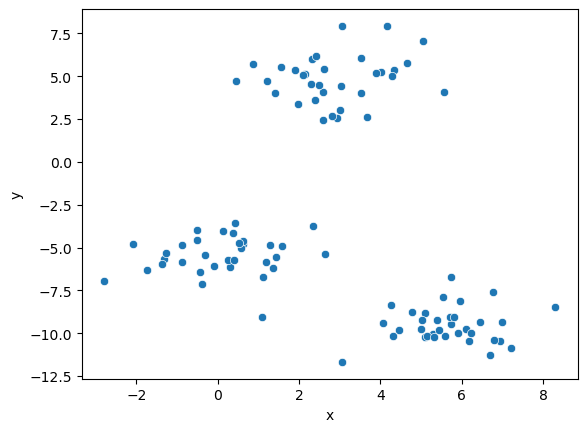

In [3]:
# 데이터셋 plot
sns.scatterplot(x="x", y="y", data=points, palette="Set2")

## 2) 모델 구현, 학습
K-Means모델을 직접 학습해보고 이해해봅니다.

K-Means 모델은 클러스터링중 가장 널리 사용되고 있는 모델입니다. K개의 클러스터를 설정하면 EM알고리즘에의해 클러스터의 중심값을 평균값으로 업데이트 해 나아가면서 최적의 해를 찾게됩니다.

Kmeans 학습은 다음과정을 통해 학습됩니다.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/5/5e/K_Means_Example_Step_1.svg/124px-K_Means_Example_Step_1.svg.png)

1) 클러스러 평균값을 랜덤으로 초기화하여 지정합니다.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a5/K_Means_Example_Step_2.svg/139px-K_Means_Example_Step_2.svg.png)

2) 각 데이터 샘플들은 가장 가까이 있는 평균값을 기준으로 묶습니다. 평균값을 기준으로 분할된 영역은 보로노이 다이어그램으로 표시할수 있습니다. 이 과정이 EM알고리즘에서 Estimation 과정입니다.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3e/K_Means_Example_Step_3.svg/139px-K_Means_Example_Step_3.svg.png)

3) K개의 클러스터의 중심값을 기준으로 평균값을 업데이트합니다. 이 과정이 Maximization 과정입니다.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d2/K_Means_Example_Step_4.svg/139px-K_Means_Example_Step_4.svg.png)

4) 수렴할때까지 2), 3) 과정을 반복합니다.

이제부터 K-Means 알고리즘을 직접 구현해봅니다.

### Step 1.
K-Means알고리즘은 미리 클러스터 갯수인 K값을 지정해야합니다. 적당한 K 값을 지정하세요.
지정한 값에 맞춰서 초기 중심점을 샘플에서 랜덤으로 선택합니다.

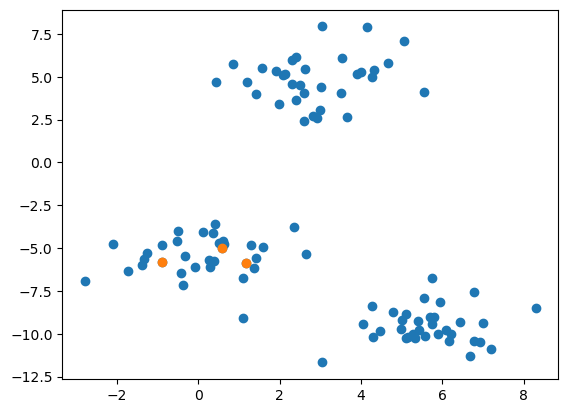

In [4]:
def initialization_kmeans(K, random_state=15):
    # select random initial centroid
    centroids = points.sample(K, random_state=random_state)
    return centroids


K = 3# <your code> define number of clusters
centroids = initialization_kmeans(K)

# visualization
plt.scatter(points['x'], points['y'])
plt.scatter(centroids['x'], centroids['y'])
plt.show()

### Step 2.
모든 샘플에서 각 중심점으로부터의 거리를 구하고 가장 가까운거리의 클러스터로 해당 샘플을 할당합니다.

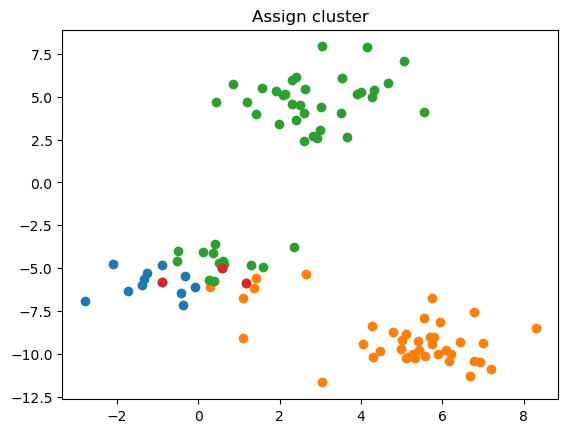

In [5]:
def assign_cluster(points, centroids):
    # caclulate distance with points and centroids.
    distance = sp.spatial.distance.cdist(points[["x", "y"]], centroids, "euclidean")

    # assigned to the cluster of the center point with the shortest distance
    cluster_num = np.argmin(distance,axis=1)

    result = points.copy()
    result["cluster"] = np.array(cluster_num)
    return result


def show_clusters(points, centroids, K, title=""):
    for i in range(K):
        sampels = points.loc[points.cluster == i]
        plt.scatter(sampels['x'], sampels['y'])
    plt.scatter(centroids['x'], centroids['y'])
    plt.title(title)
    plt.show()


result = assign_cluster(points, centroids)
show_clusters(result, centroids, K, title="Assign cluster")

### Step 3.
클러스터의 평균값으로 중심점을 업데이트합니다.

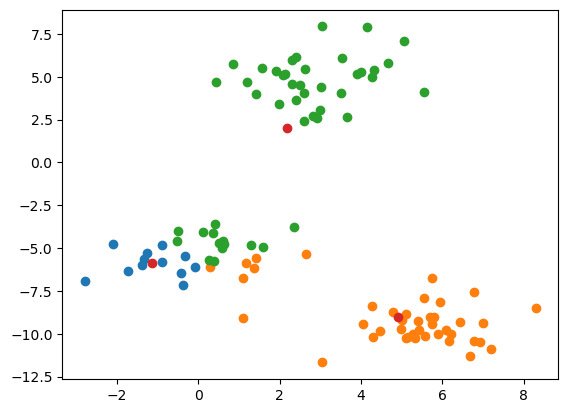

In [6]:
def update_centroids(result):
    centroids = result.groupby("cluster").mean()
    return centroids

centroids = update_centroids(result)
show_clusters(result, centroids, K)

### Step 4. 
수렴 할 때 까지 step 2. step 3.을 반복합니다.

> 위에서 정의한 코드를 사용하여 아래 `<your code>` 부분을 완성하세요.

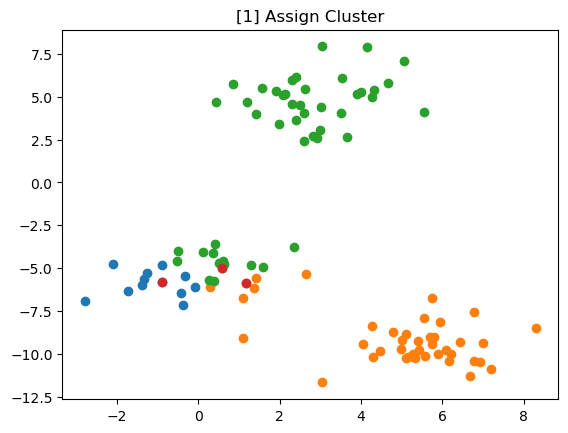

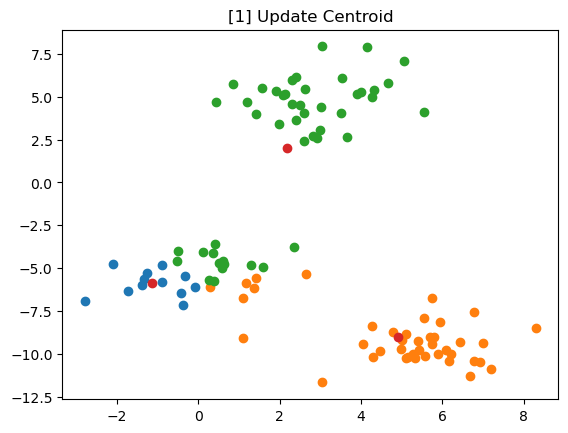

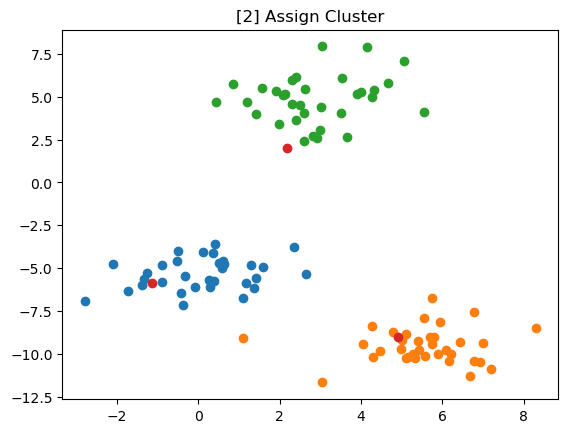

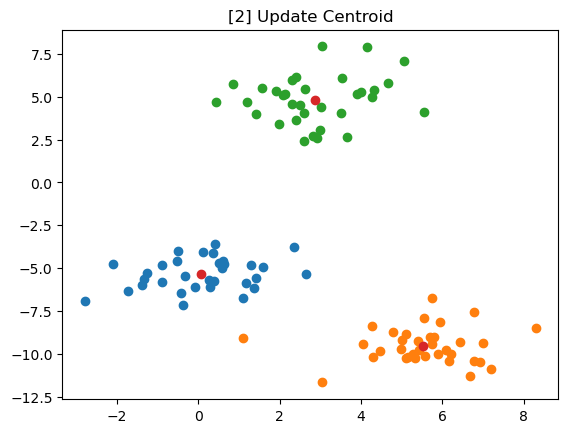

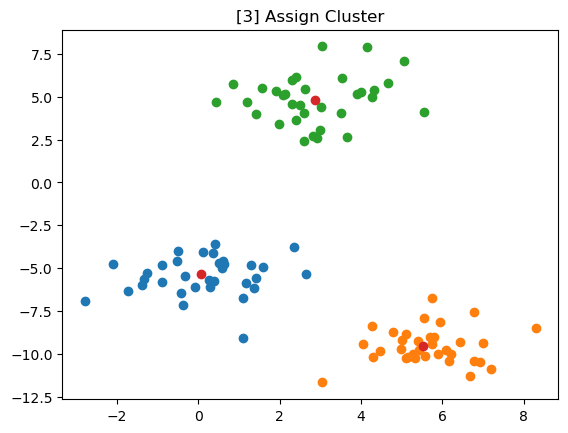

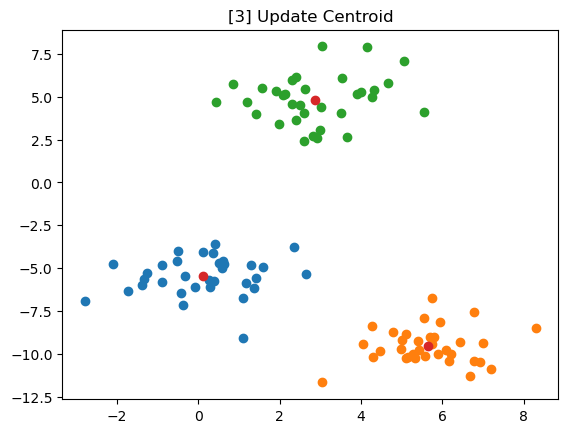

In [8]:
def kmeans(points, K, max_iter=3, random_state=15):
    # step 1.
    centroids = initialization_kmeans(K,random_state) # <your code> assign sample to cluster. Use defined function.

    for i in range(max_iter):
        # step 2.
        result = assign_cluster(points, centroids)# <your code> assign sample to cluster. Use defined function.
        show_clusters(result, centroids, K, title=f"[{i+1}] Assign Cluster")

        # step 3.
        centroids = update_centroids(result) # <your code> update centroids. Use defined function.
        show_clusters(result, centroids, K, title=f"[{i+1}] Update Centroid")

    return points, centroids

K = 3# <your code> set number of Clusters
random_state = 15 # originally 15
points, centroids = kmeans(points, K, random_state=random_state)


## 3) Discussion

**1) random state를 다르게 변화하여 돌려보고 나타나는 문제에 대해서 설명해보세요.**

[답변작성]

random state 를 15가 아닌 1로 설정하고 코드를 실행해보니 클러스터링이 제대로 되지 않는 것을 확인할 수 있었다. 분명히 내가 판단하기로는 같은 cluster에 들어가야할 점들이 서로 다른 클러스터로 구분이 되기도하고 서로 다른 클러스터임에도 같은 클러스터로 나타나는 현상을 확인할 수 있었다. 이러한 문제가 발생하는 이유는 K-means clustering은 초기 군집 중심의 위치에 따라 clustering 성능이 크게 달라지기 때문이다. 

**2) 문제 1번에서 나타난 문제를 해결할 수 있는 방안은 무엇이 있나요?**

[답변작성]

이러한 문제를 해결할 수 있는 방안으로는 여러 개의 초기 군집 중심을 이용하는 것이다. 따라서 나쁜 결과가 나오면 다시하고 또 나쁜 결과가 나오면 다시하고, 이렇게 좋은 결과가 나올 때까지 초기 군집 중심을 바꿔가며 반복한다. 그렇다면 여기서 어떤 결과가 나왔을 때 그 결과가 좋은 결과인지 아닌지는 어떤 기준으로 판단할 것인가에 대한 문제가 생긴다. 그 문제는 cost function을 정의하여 그 cost function을 최적화하는 문제로 바꾸어 판단하면 된다.
목적함수를 계산하는 방법은 다음과 같이 군집 중심과의 거리제곱의 합으로 계산한다.
$$ J(Z,\bf{A}) = \sum_{i=1}^{n}{\sum_{j=1}^{k}{a_{ji}dist(x_{i},z_{j})}}$$


---

# P5.B:  scikit-learn을 이용한 클러스터링 (5점)

### 학습목표
- KMeans 모델을 이용하여 Iris 데이터를 군집화 할 수 있다.
- Scikit-Learn을 이용하여 모델 학습, 검증 과정을 구현할 수 있다.

### 실습내용
Scikit-Learn의 KMeans를 이용하여 군집화를 학습해 봅니다. K-Means 사용법은 아래 링크를 참고하세요.  
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

실습은 다음 순서로 진행됩니다.
- 1) 데이터셋 loading
- 2) KMeans 모델 구현, 학습, 검증, Decision Boundary 시각화 **<직접 구현>**
- 3) Discussion

**이번 실습에서 여러분은 `2) KMeans 모델 구현, 학습, 검증, Decision Boundary 시각화` 부분의 코드를 직접 작성합니다.**

앞으로 대부분의 실습도 위와 같은 순서로 진행됩니다. 이번 실습을 통해 각 부분의 코드를 이해하고 다음 실습에 참고하도록합니다.


### 점수
- `<your code>` 부분 총 4점
- Discussion 부분 1점

`.ipynb 파일과 함께 .html 파일 (File -> export as -> HTML)도 함께 제출하세요. 하나만 제출할시 감점이 있습니다.`

In [9]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1) 데이터셋 loading
P3 실습에서 사용하였던 IRIS 데이터를 사용합니다.

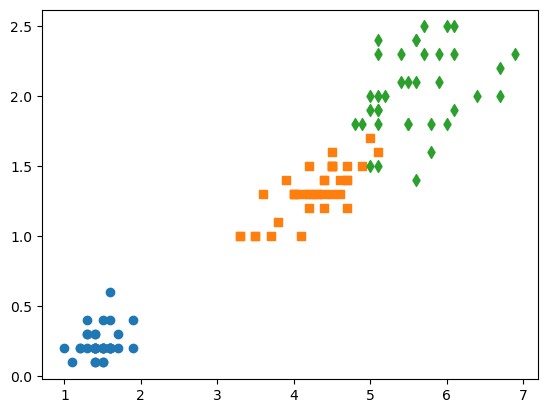

In [10]:
iris = datasets.load_iris()
X = iris.data[:, 2:4]  # we only take the first two features.
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X,y)# <your code> split dataset into trainset and testset with `train_test_split` function

# 데이터셋 plot
plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 0], 
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 0],
            marker='o')

plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 1], 
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 1],
            marker='s')

plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 2], 
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 2],
            marker='d')
plt.show()

## 2) K-Means 모델 구현, 학습

Scikit-learn의 K-Means모델을 이용하여 위 데이터셋을 군집화해 봅니다.

In [13]:
# 기존의 선형 커널로 분류를 시도해 봅니다.
kmeans = KMeans(n_clusters = 3, random_state = 15, n_init='auto').fit(X_train, y_train)# <your code> define number of clusters # <your code> training with train dataset

C:\Users\HaneulKim\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


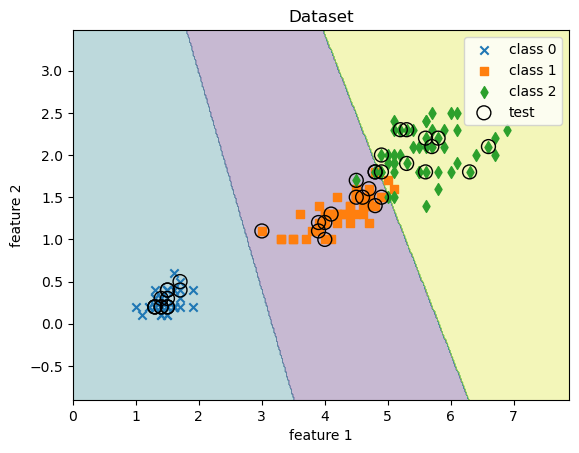

In [14]:
### 데이터셋에서 Decision Boundary 시각화
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                       np.arange(x2_min, x2_max, 0.02))
Z = kmeans.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.3)

# 그래프로 표현
plt.scatter([i[0] for idx, i in enumerate(X) if y[idx] == 0], 
            [i[1] for idx, i in enumerate(X) if y[idx] == 0],
            label='class 0', marker='x')
plt.scatter([i[0] for idx, i in enumerate(X) if y[idx] == 1], 
            [i[1] for idx, i in enumerate(X) if y[idx] == 1],
            label='class 1', marker='s')
plt.scatter([i[0] for idx, i in enumerate(X) if y[idx] == 2], 
            [i[1] for idx, i in enumerate(X) if y[idx] == 2],
            label='class 2', marker='d')
## testset 강조
plt.scatter([i[0] for idx, i in enumerate(X_test)],
            [i[1] for idx, i in enumerate(X_test)],
            label='test', facecolors='none', edgecolor='black', s=100, marker='o')

# 그래프로 표현
plt.title('Dataset')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.show()

## 3) Discussion

**1) KMeans로 풀리지 않는 문제는 어떤것이 있나요?**

[답변작성]
1. 비선형 클러스터 : KMeans 클러스터 알고리즘의 경우 클러스터를 구분하는 데 있어 선형 경계를 기반으로 가정한다. 따라서 비선형 모양의 클러스터를 가진 데이터 셋의 경우에는 KMeans로 클러스터를 구분하는데 한계가 있다. 
2. K를 몰라서 K를 직접 결정해줘야 하는 경우

**2) KMeans로 풀리지 않는 문제의 경우 어떤 알고리즘을 사용하면 되나요?**

1. 비선형 클러스터
- 비선형 클러스터 문제를 해결할 수 있는 알고리즘으로 대표적으로 DBscan이 있다. DBscan은 밀도 기반의 클러스터링 알고리즘으로, 클러스터의 밀도를 고려하여 클러스터를 식별한다. 이 알고리즘은 데이터가 밀집되어 있는 영역을 클러스터로 식별하고, 그 외의 밀도가 낮은 영역은 이상치로 처리한다. 따라서 경계가 선형적으로 형성되지 않아 비선형 모양의 클러스터 문제를 해결할 수 있다.

2. K를 몰라서 K를 직접 결정해줘야 하는 경우
- Elbow Method를 사용함. K를 늘려가면서 목적함수를 계산하고, 그 목적함수가 최적이 되는 지점이 최적 K값이라고 추정한다. 하지만 이 경우 그 지점이 최적인지에 대한 것이 명확하지 않음. 따라서 일단 K를 임의로 지정하여 클러스터링을 진행하고 그것을 다른 downstream에 적용하여 거기서 보여주는 성능을 통해 K를 결정하기도 함.


**3) KMeans의 장단점에 대해 설명하세요**

KMeans 장점

1. K-means는 구현과 이해가 매우 쉬운 알고리즘이다. 간단한 수식과 반복 알고리즘을 기반으로 하여 많은 클러스터링 문제에 꽤 잘 적용이 되는 사례가 많다.

2. 평균 계산 복잡도가 데이터셋에 대해서 선형적으로 증가하기 때문에 대부분의 경우 데이터 크기에 비례해서 다른 알고리즘에 비해 비교적 빠른 시간안에 수렴한다.


KMeans 단점

1. 초기 중심점에 민감하다. 초기 군집 중심의 선택이 알고리즘의 수렴과 클러스터링의 품질에 큰 영향을 미친다.

2. 클러스터의 개수 즉 K를 미리 지정해주어야한다. K-means 는 몇 개의 클러스터로 군집을 구분할지 미리 알아야한다.

3. K-means 알고리즘은 클러스터를 구분하는 데 있어서 각 클러스터가 선형경계로 구분된다고 가정하기 때문에 비선형 모양의 클러스터를 잘 처리하지 못한다.
